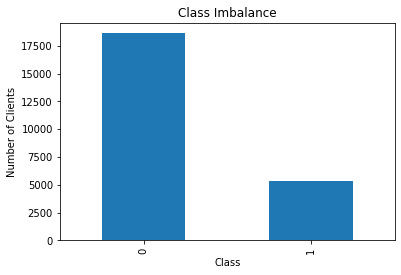

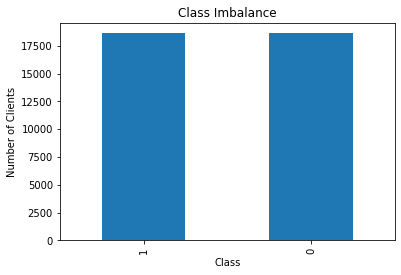

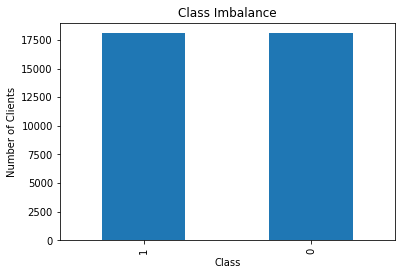

In [1]:
%run EvalModel_file.ipynb
%run Data_Preprocessing.ipynb

## Benchmarking

### importing ML models
hello

In [2]:
import xgboost
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

### Model initialization

In [3]:
xgb_reg = xgboost.XGBRegressor(eta=0.3, gamma=0.5, use_label_encoder=False)
xgb_clf = xgboost.XGBClassifier(eta=0.3, gamma=0.5, use_label_encoder=False)
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=20, learning_rate=1)
rnd_clf = RandomForestClassifier()
log_clf = LogisticRegression(penalty = 'l1', max_iter=1000, C=0.5, solver = 'liblinear')

[21:06:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Metrics for model name: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
Accuracy score: 0.7733333333333333
Recall score: 0.48341232227

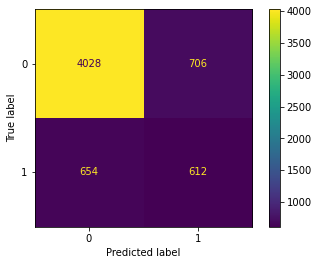

In [4]:
EvalModel(xgb_clf, X_train,y_train,X_test,y_test, verbose=True, confusion_matrix=True)

[21:06:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Metrics for model name: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0.5,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
Accuracy score: 0.7733333333333333
Recall score: 0.48341232227

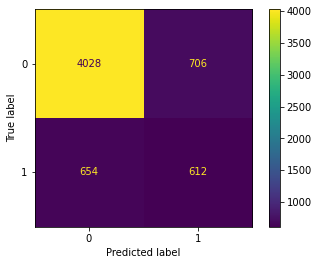

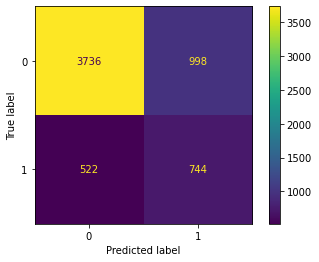

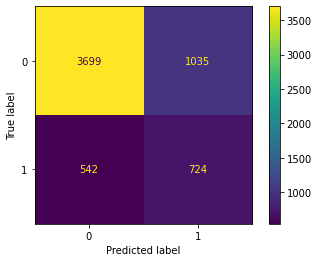

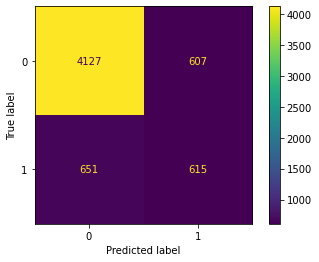

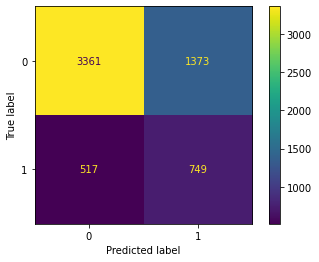

In [5]:
models = [xgb_clf, ada_clf, gbrt, rnd_clf, log_clf]

for model in models:
    EvalModel(model, X_train,y_train,X_test,y_test, verbose=True, confusion_matrix=True)

[21:07:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:07:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Metrics for model name: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9267151796260045,
              gamma=1.01854676464289, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=18, min_child_weight=

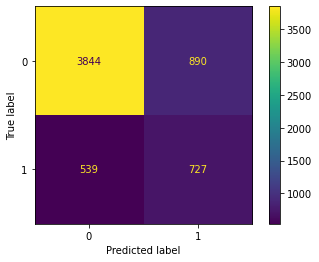

In [6]:
# EvalModel(xgb_reg,X_train,y_train, X_test, y_test, verbose=True)

xgb_best = xgboost.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.05,  
                      colsample_bytree = 0.9267151796260045,
                      min_child_weight = 9,
                      reg_lambda = 0.583387,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=180, 
                      reg_alpha = 61.0,
                      max_depth=18, 
                      gamma=1.01854676464289,
                      use_label_encoder=False)
EvalModel(xgb_best,X_train,y_train, X_test, y_test, verbose=True, confusion_matrix=True)

In [7]:
voted_prediction = ((xgb_best.predict(X_test)+gbrt.predict(X_test)+ada_clf.predict(X_test))/3).round()
metrics.accuracy_score(y_test, voted_prediction)



0.7541666666666667

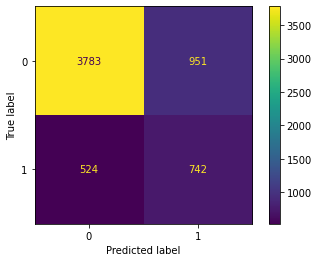

In [8]:
ShowConfusionMatrix(y_test, voted_prediction)

0.8006917542888766


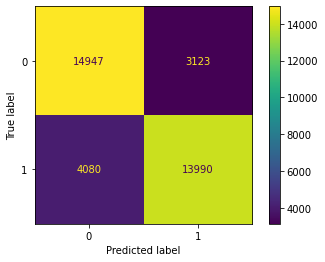

In [9]:
y_train_predicted = xgb_best.predict(X_train)
print(metrics.accuracy_score(y_train,y_train_predicted))
ShowConfusionMatrix(y_train, y_train_predicted)


In [10]:
EvalModel(xgb_reg,X_train,y_train, X_test, y_test, verbose=True)

Metrics for model name: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0.5,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)
Accuracy score: 0.7761666666666667
Recall score: 0.49921011058451814
Precision_score: 0.47129008202833705
ROC/AUC score: 0.674721236111862
F1 score: 0.48484848484848486


